In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
#from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [2]:
fldr = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped'

In [3]:
files = os.listdir(fldr)

In [4]:
ages=[]
#genders=[]
images=[]
org_images = []

for fle in files:
    if fle[0].isdigit():
        age = int(fle.split('_')[0])
        ages.append(age)
        #gender = int(fle.split('_')[1])
        #genders.append(gender)
        total = fldr+'/'+fle
        print(total)
        image = cv2.imread(total)
        org_images.append(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(48,48))
        image = preprocess_input(image)
        images.append(image)
        if len(images) == 15000:
            break

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_0_0_20170112213500903.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_0_0_20170112215240346.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_1_0_20170110183726390.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_1_0_20170112213001988.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_1_0_20170112213303693.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_1_0_20170112215032192.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/100_1_0_20170117195420803.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sa

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225246490.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225252799.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225402690.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225414790.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225417177.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225421531.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_0_0_20170110225442428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203642966.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203653735.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203759972.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203905538.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203917216.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109203924076.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/10_1_0_20170109204148144.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170103200509559.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170103200824775.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170104012556563.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170110220408722.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170110220453002.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170110220500946.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_0_0_20170110220518578.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_1_4_20170104005813063.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/11_1_4_20170109201611941.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_0_0_20170103200900511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_0_0_20170103201859385.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_0_0_20170104013257914.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_0_0_20170109213205384.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_0_0_20170110215606404.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203240213.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203306886.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203310061.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203338340.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203424756.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203536309.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_0_20170109203606169.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_4_20170103200721583.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_4_20170103200804119.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_4_20170104011715593.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_4_20170109214232071.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/12_1_4_20170117201252893.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_0_0_20170103200413990.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_0_0_20170103200550455.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170109213526011.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170109214314841.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170109214402325.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170109214425620.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170109214635943.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170110220422857.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/13_1_0_20170110224453650.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_1_20170113145153262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_1_20170113151234215.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_1_20170116205529704.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_1_20170117133924867.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_1_20170117141604244.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_2_20170103200642238.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_0_2_20170103201038791.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109204358190.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109204620092.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109204846649.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109204918699.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109205344937.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109205406978.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/14_1_0_20170109212518607.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170104225947233.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170105183251055.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170105183254311.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170110223430616.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170110224250144.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170110224312647.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_0_20170110224324459.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_3_20170105183235993.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_3_20170110225627090.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_4_20170103201002253.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_4_20170103201013615.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_4_20170103233214059.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_4_20170104011201568.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_0_4_20170110232416743.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20161219193333691.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170102234824195.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170104012024121.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170104012031136.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170104012441969.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170104013425867.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/15_1_2_20170104015856031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231617005.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231627902.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231633585.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231636100.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231645188.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231646278.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110231647118.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232605131.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232611516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232613101.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232647979.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232714508.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232724382.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_0_0_20170110232725516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109204409777.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109204530608.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109205435776.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109212357604.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109212413425.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109212446278.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_0_20170109212513215.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_1_20170116204334206.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_1_20170117172336195.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_1_20170117194816437.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_2_20170109214153823.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_2_20170109214552372.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_2_20170116162343874.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/16_1_3_20170104012449865.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170116205554725.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170116221917954.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170117091447979.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170117134955265.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170117193043124.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_0_20170120133328941.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_0_1_20170110224421697.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109213933756.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109213944067.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109214008165.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109214021426.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109214048004.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109214200825.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/17_1_0_20170109214431887.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110223927225.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231228322.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231524976.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231625906.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231644037.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231703804.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_0_20170110231723682.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_3_20170117135605224.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_3_20170117140743776.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_3_20170117153126523.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_3_20170119144144877.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_3_20170119151213151.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_4_20170103201305015.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_0_4_20170103201550447.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213904824.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213911368.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213919463.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213922168.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213931089.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213933756.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_0_20170109213935367.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170109214221868.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170109214355606.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170112231616704.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170113002913732.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170113005132350.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170113005321501.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_1_20170114030232014.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_4_20170117140224544.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_4_20170117185609466.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/18_1_4_20170117193229357.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_0_0_20170102233014401.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_0_0_20170103180141544.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_0_0_20170103201333351.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_0_0_20170103201406775.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170109214615122.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170112231655238.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170116163837603.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170116201120465.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170116205908124.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170116212113630.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/19_1_0_20170117140530071.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219200250923.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219200338012.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219202455708.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219203009924.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219203503252.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219203657925.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20161219204512212.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110211538942.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212552670.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212555368.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212601951.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212603790.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212623527.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_0_20170110212624891.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_1_20170110213707879.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_1_20170110213808936.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_1_20170110213810856.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_1_20170112211228948.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_1_20170117130048013.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219140525218.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219140530307.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155802845.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155822605.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155850477.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155854085.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155855829.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155857576.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219155859061.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194543059.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194716652.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194721851.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194800523.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194804739.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194811588.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219194820459.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204024196.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204108580.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204151442.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204156668.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204252348.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204409620.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219204418485.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219221912695.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219221919847.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219222014119.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219222035808.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219222040503.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219222043223.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_2_20161219222046607.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225357184.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225410225.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225413968.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225445327.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225519457.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225559648.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161219225611272.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220144838191.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220144949223.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220145156367.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220145213471.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220145416255.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220145532127.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_3_20161220145820446.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221195316815.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221195419136.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221195827599.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221195857728.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221195955560.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221200034160.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_0_4_20161221200056240.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219205428229.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219205529388.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219205534526.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219211440749.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219212433510.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219221127151.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20161219221246503.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191415528.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191436874.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191440780.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191447766.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191449860.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191518278.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170109191535466.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_0_20170117192912861.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20161219155940125.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20161219205055053.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20170103210044250.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20170109190848182.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20170109191050443.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_1_20170109191243420.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219162523262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219162635831.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219162730478.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219162843079.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219190719971.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219190745330.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219192240930.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219211512447.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219211701334.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219211944925.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219211948405.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219212221341.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219212313989.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_2_20161219212416550.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225602184.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225640200.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225657032.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225730216.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225943008.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219225945416.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161219230239192.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220220536274.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220220541057.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220220548777.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220220708394.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220221547970.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220221800802.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_3_20161220221808354.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103204825447.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103204831032.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103205129266.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103205134402.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103210113314.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103210736044.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/1_1_4_20170103212116187.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132411433.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132537718.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132622368.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132703608.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132705262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132706143.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_0_1_20170113132727849.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170104020801388.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170104020855852.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170104021334149.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170105000707730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170105002441599.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170105183447816.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_0_20170105183449767.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112230742277.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231407182.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231413086.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231449708.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231738487.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231743279.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_1_20170112231744071.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170104231832057.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170104233643891.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170105000847091.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170117141108233.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170117141155272.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170119144712261.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/20_1_3_20170119150812423.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170116225141614.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141432129.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141435314.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141529337.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141603616.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141823641.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_0_20170117141910383.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119153827185.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154036769.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154042345.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154046385.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154213179.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154219118.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_0_3_20170119154239873.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170116215708125.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170116220220347.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170116220224031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170116220441404.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170116234657499.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170117141734034.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_0_20170117141834506.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170114032208983.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170116020956813.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170116175832136.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170116215704702.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170116215855605.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170116233611534.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_1_20170117132654031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222116782.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222118687.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222120446.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222121713.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222522503.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222653479.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_3_20170104222758121.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170103230521217.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170103233532676.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170103233920299.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170103233924667.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170103234037067.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170104005731615.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/21_1_4_20170117193725542.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113133336209.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113133350977.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113133405641.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113133555880.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113133604687.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113150439151.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_1_20170113150441654.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_3_20170119162837005.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_3_20170119162917829.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_3_20170119162922591.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_3_20170119162941062.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_3_20170119202650701.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_4_20161221200222680.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_0_4_20161221202100745.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170103180755073.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170104005441633.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170105002015683.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170105183837056.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170112192911566.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170112202834858.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_1_20170112203821018.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170104022012028.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170104022959942.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170104231245440.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170105183412088.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170108224643996.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170114033415747.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_2_20170116161424702.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104223125535.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104223452679.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104223821199.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104231655336.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104231657849.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104231706746.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_3_20170104231709097.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103224424415.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103224503415.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103224814016.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103224958800.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103225112465.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103225134240.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/22_1_4_20170103225813392.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113133833362.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113133840296.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113133855489.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113133908465.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113150723591.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113150854335.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_1_20170113150913751.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163804981.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163838933.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163841604.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163843478.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163855005.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163856511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_0_3_20170119163907693.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170112234313416.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170112234315344.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170112234331591.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170116173236417.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170116201840541.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170116211903141.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_0_20170116221713318.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170113195607925.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170113195614940.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170114024652649.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170114030249007.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170114030641409.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170114033443186.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_1_20170114033456731.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173126492.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173127575.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173128603.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173131148.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173143018.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173145383.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_2_20170116173150921.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164432343.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164456070.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164457312.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164458614.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164501885.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164502773.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_3_20170119164504597.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_4_20170117194317100.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/23_1_4_20170117194319028.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170102233329675.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170104002326444.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170104004125063.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170104165239658.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170104230108767.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170117194524762.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170117194602044.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170117194640228.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170117204449297.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170119150204399.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170119151341215.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_0_20170119152257171.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_1_20170117194551093.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_1_20170117194748068.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_1_20170117204434040.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_1_20170117204443327.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_1_20170120133915911.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20161219190613907.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20161219192221394.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20170117141025894.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20170119165620535.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20170119165656526.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_2_20170119165700590.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_3_20161220222335651.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_3_20170104214346781.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_3_20170104214521685.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145354835.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145619730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145745474.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145745635.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145915428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117145917765.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_0_4_20170117194332787.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116211912644.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116211933213.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116214212261.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116214224254.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116214235749.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116214311227.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170116214453175.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117155121820.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117191400699.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117194528243.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117194558907.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117194613108.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117194653203.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_0_20170117194749524.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011157712.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011232616.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011234375.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011240168.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011327776.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011328232.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_1_20170113011405711.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170104022044502.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170104234618170.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170105162251371.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170105184025097.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170109213251114.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170112204451203.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170112204459483.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171543349.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171546278.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171548627.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171551289.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171557699.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171600984.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116171604159.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174416603.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174418910.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174420253.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174421540.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174428658.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174432626.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_2_20170116174434040.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104223610175.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104223616047.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104231344873.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104231426665.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104231625010.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104231911026.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170104231916690.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119170600774.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119170901622.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119170909047.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119170911086.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119170926830.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119171007670.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_3_20170119171011143.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170115235433094.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170116214244943.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170116220449622.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170116222729168.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170117010442715.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170117145459404.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/24_1_4_20170117150332484.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116212019911.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116213450000.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116213510820.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116213542860.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116215601291.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116215652482.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170116220630282.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117193028403.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117195019627.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117195027938.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117195127741.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117195250189.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117195255340.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_0_20170117203843296.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116003017226.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116003121821.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116003152620.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116025959945.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116205335757.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116205628998.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_1_20170116220224657.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170117151819492.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119144441117.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119144603197.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119144812749.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119150353974.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119150637166.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_3_20170119152752375.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_4_20170117195016421.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_4_20170117195023516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_0_4_20170117195058860.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170103163054063.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170103163218903.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170103163718321.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170103175619551.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223826765.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223827511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223848612.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223849950.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223850990.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223859777.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170116223905448.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170117203811656.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170117204147750.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170119163307644.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170119172023545.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170119172027811.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170119172029833.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_0_20170119172030770.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116001414790.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116001921217.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116001936456.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116001945041.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116002112614.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116003155558.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_1_20170116003157389.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116162532991.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116162822749.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116162834422.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116165425465.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116165435737.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116165453584.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_2_20170116165500425.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232002457.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232025362.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232046530.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232048826.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232049890.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232058250.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170104232101034.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119171923120.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119171925976.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119171943592.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119171949009.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119171956657.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119172014464.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_3_20170119172028785.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_4_20170117195141428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_4_20170117195158652.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/25_1_4_20170119164406148.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170102233359482.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170103181004512.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170103181224784.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170103235356420.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210127510.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319024.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319156.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319406.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319560.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319768.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170113210319774.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170116232936514.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170116233047853.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170116233436547.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170116235217494.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117000343982.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117003310493.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117003319885.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172603774.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172613381.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172620391.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172624038.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172630031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172649700.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170117172704775.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119180141460.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119180207803.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119180222692.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119180652115.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119184314895.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170119184315753.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_0_20170120134035224.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135339953.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135342690.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135416706.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135514506.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135516970.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135532482.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113135547147.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113181814396.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113181829839.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113182414254.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113182433174.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113182601062.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113182724502.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170113182742605.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116193145119.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116193228728.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116193350792.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116193423469.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116200636640.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116200714834.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170116200944233.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117152417815.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117154145261.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117154704178.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117170403771.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117170851628.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117171618235.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_1_20170117172711486.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175433114.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175439275.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175441103.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175514457.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175516176.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175845872.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116175904702.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116182629321.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116182630634.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116182654158.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116182756349.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116183002811.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116183004847.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_2_20170116183020432.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153030981.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153033332.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153104987.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153142796.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153347116.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153400030.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170117153613636.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180343596.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180344516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180345268.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180358932.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180400891.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180419195.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119180439076.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183334094.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183349137.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183349949.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183421709.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183458846.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183545783.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_3_20170119183546909.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170103235432764.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170103235523972.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170103235546910.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170103235609892.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170103235645596.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170104165424576.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170104170011130.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170117200533197.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170117200550222.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170117200626708.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170117201113262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_0_4_20170120140013888.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170103175557343.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170103180235712.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113182514710.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210126901.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210127127.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210127505.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210604325.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210605016.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170113210605337.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117001335885.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003136628.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003146021.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003208726.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003218198.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003226902.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117003240286.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173557316.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173613245.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173639429.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173648397.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173739125.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173801797.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117173945869.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117201918694.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117201924879.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117201944942.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117201947511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170117202010288.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170119180130438.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_0_20170119192623081.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112213354350.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112213442439.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112213448336.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112224805692.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112230436478.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112230519613.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170112230547118.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012119680.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012233232.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012239224.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012346273.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012350417.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113012356872.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170113134115794.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116153853816.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116154333887.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116154712959.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116154716047.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116154727986.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116155039588.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116155754189.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116222916879.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116222929223.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116223036741.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116223057328.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116223107516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116223109423.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116223115624.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116232809522.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116232810500.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116232824362.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116233044289.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116233048680.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116233051385.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_1_20170116233102426.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022154229.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022229597.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022244853.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022532727.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022654101.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022817638.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170104022829221.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116175938987.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116175944209.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116175958704.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116180003876.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116180005797.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116180008794.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116180014046.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116182615565.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116182624014.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116182638875.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116182804381.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116183011989.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116183016628.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116183651297.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184453651.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184454934.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184456081.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184457094.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184502052.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184510768.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_2_20170116184512597.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222725472.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222736351.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222740327.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222745511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222805519.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222810087.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170104222813183.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170109140221559.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170112212035747.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170113011802678.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170116154740506.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170116180310868.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170116184306842.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170116184646017.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174340222.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174342230.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174352558.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174433574.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174439983.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174443279.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170117174445062.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192422098.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192426755.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192503866.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192520722.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192522130.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192540907.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119192546129.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193145481.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193146097.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193146682.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193147306.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193147891.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193148570.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_3_20170119193149338.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174153056.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174218966.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174256614.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174310909.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174316560.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174327119.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/26_1_4_20170117174505182.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170114033204410.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170114034255912.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170116182634081.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170116194225517.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170116203031756.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170116204122640.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170116204126806.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170117202102927.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170117202105807.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170117202108094.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170117202125551.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170117202216127.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170119145326086.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_0_20170119150234550.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117010749619.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117012340251.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117012341879.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117012354143.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117012811248.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117013622859.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_1_20170117013649763.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193328922.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193329569.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193330242.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193331082.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193331714.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193332498.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_2_20170119193349130.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103234827428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103235026964.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103235409988.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103235752276.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103235757172.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170103235800445.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_0_4_20170104002159117.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117010411661.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117010449413.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117012350076.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117014038281.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117120616194.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117120618507.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_0_20170117120620652.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170113011238888.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170113011433800.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170113012330703.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170113012427688.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170114024839447.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170114030211993.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_1_20170114030435835.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116162949938.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163003893.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163118798.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163123283.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163338293.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163552814.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116163601765.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116175146257.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116175930683.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116184848621.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116184855653.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116185938978.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116190003226.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_2_20170116192014113.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_3_20170119194424402.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_3_20170119194425057.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_3_20170119194425619.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_4_20170103175504767.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_4_20170103181806561.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_4_20170103182145377.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/27_1_4_20170103183838762.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116212102377.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116213506025.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116214238404.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116214501624.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116215505239.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116220549107.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170116220611954.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180609562.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180611163.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180613031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180620153.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180622480.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117180626585.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_0_20170117184714695.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113145739893.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113150719161.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113150754253.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113150932640.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113151043367.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113151216654.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170113151347800.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116210503300.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116212304502.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116213517627.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116214405900.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116215621993.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116215824899.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_1_20170116221732374.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170112213615815.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170113190312841.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170116162019874.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170116162117606.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170116162328748.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170116162829960.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_2_20170116163443678.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119144359718.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119162759516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119162805164.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119163006483.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119164001559.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119164109405.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119164321820.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194920547.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194921298.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194921883.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194926283.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194927291.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194927932.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_0_3_20170119194928605.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170103183935666.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104021158812.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104165123368.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104165233241.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104171611673.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104172639340.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170104181551957.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117092254042.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117121818523.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117121841046.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117121842806.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117121929252.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117122001989.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_0_20170117122002945.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112220128599.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112220225407.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112222156481.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112222231219.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112230622262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112230737559.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170112231943575.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117020405380.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117020409415.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117020424778.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117020448529.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117020452350.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117021633232.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_1_20170117022158414.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164237338.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164331837.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164515900.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164519017.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164524917.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164529258.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116164552683.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116190131133.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116190142300.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116190143221.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116191639838.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116192003103.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116192106479.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_2_20170116192305668.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195054803.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195056083.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195056772.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195058029.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195058724.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195100723.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/28_1_3_20170119195103018.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104201134466.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104201322098.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104202110730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104202211753.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104205704132.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104230319649.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170104235501676.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180900108.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180918673.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180920915.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180933082.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180936418.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180942324.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_0_20170117180949666.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116194210361.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116194416791.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116195112736.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116202000095.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116203025802.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116203358423.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_1_20170116203619812.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116172041615.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116172141170.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116173703903.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116182206717.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116190029257.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116190156845.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_2_20170116192725270.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170108223951591.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170114033029580.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170116210407115.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170117094742046.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170117100325932.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170117180903787.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_0_4_20170117180914972.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170114030939325.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170114031410630.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170116003521569.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170116173132299.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170116175235312.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170116175630702.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_0_20170116180417150.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170112235118232.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170112235125873.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170113000121657.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170113000314554.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170113000632601.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170113000843651.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170113001147795.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117130623479.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117132637271.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117165555736.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117183625423.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117184351496.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117190506301.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_1_20170117190515909.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104214540068.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104222730103.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104223010439.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104223300263.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104232346298.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104232524938.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/29_1_3_20170104232621386.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170109194439365.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110205345455.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110211457583.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110211501002.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110211504184.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110211511626.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_0_20170110212644094.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219151902683.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219152009555.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219152914700.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219154627053.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219155636293.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219155959781.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219160057853.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219211219902.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219211913310.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219212013262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219212035798.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219212235749.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219212329726.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_2_20161219212403166.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20161221203017368.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103202407440.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103202421392.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103202456584.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103204813658.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103205108602.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_0_4_20170103205319954.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_1_20170109194606626.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_1_20170109194651472.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_1_20170113002906252.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_1_20170116231935539.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_1_20170117133919045.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219140650888.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219140706417.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219194411043.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219195008500.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219195509211.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219195813835.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219195825228.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219200522795.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_2_20161219202547820.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219225920200.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230018024.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230048688.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230137680.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230145088.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230209511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_3_20161219230338336.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210129538.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210335629.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210746899.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210830609.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210839634.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210934483.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/2_1_4_20170103210946139.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117120709730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117120906582.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117123740914.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117125941072.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117125951293.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117130615780.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117130633696.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117171914259.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117172014219.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117172644485.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117180449799.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117181104996.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117181118268.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_0_20170117181207964.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116010647849.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116010659651.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116011020977.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116024856991.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116025831395.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116191707734.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_1_20170116213438554.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116172536135.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116172753303.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116172833941.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116172917302.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116172925949.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116173004384.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_2_20170116173046870.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119153044871.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119155828315.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119155845146.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119162644734.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119164115989.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119195646516.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_0_3_20170119195653219.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170105165034356.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170105170137612.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170108225424420.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170109001620649.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170109012211696.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170109012829305.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170109141417666.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117144452546.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117144819225.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117144955746.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117145129099.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117145258777.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117150420803.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_0_20170117150430298.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112213021902.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215039472.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215047361.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215057720.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215101145.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215102792.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_1_20170112215103998.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104020408339.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104020413511.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104020459348.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104020950540.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104021318733.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104021619821.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170104022925822.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116191922002.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192047079.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192241195.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192245601.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192249012.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192313635.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_2_20170116192334382.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170117191057107.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119143632686.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119144121804.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119163739022.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119195840428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119195849148.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/30_1_3_20170119195850724.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116191337484.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116191348943.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116193252933.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116195723154.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116210515941.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170116233154004.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_0_20170117012336960.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170116203947826.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170116214505667.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170116220207245.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170116235513414.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170117021212992.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170117021841979.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_1_20170117130014250.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_3_20170119200051395.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_3_20170119200052268.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_3_20170119211535833.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_4_20170103235207122.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_4_20170104200510431.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_4_20170105161451773.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_0_4_20170108235352933.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170111204355636.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112204529987.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112210531485.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112210802028.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112211518637.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112213126246.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170112222202714.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170117162539709.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170117164303317.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170117170047936.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_1_20170117171933533.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_2_20161219203219180.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_2_20161219211907149.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_2_20170104020444076.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_4_20170117203041312.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_4_20170117203047078.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_4_20170117203051199.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/31_1_4_20170117203052559.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170103182544874.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170104165226793.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170104170147266.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117120556801.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117120718633.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117120858247.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117120910383.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117120941859.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117121634502.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_0_20170117121829950.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113134404473.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113134657712.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113134708200.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113135300458.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113135328377.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113135620561.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170113135737704.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170116194843970.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170116204750750.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170116215755940.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170117010054839.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170117020356727.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170117021355678.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_1_20170117021627922.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116191450850.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116191452915.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116193536503.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116193804883.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116201214616.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170116221122729.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_2_20170117120231708.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_3_20170120221502100.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170103235323876.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170103235510730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170104000716333.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170104005921031.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170104170351168.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_0_4_20170104170633305.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170112211450500.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170112224814924.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170112235000656.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170113000739610.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170113001614997.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170113010345079.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170113210605443.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117182456548.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117182511453.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117182528940.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117182539124.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117183907807.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117185523010.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_0_20170117203118672.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012612272.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012644721.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012735154.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012739969.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012741371.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170113012946729.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_1_20170114024532411.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170103181041008.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170103183806483.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170104023251558.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170104165057208.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170104165117233.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170104170327891.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_2_20170104202227882.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170109141308065.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170109141339133.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170109141349200.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170109141353848.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170109142352309.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170116153431215.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/32_1_3_20170116170836443.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170113134141083.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170113135311186.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170113152629721.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170113173629148.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170114034227427.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170116192517064.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_0_1_20170116215201422.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117174457343.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117174727549.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117174746798.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117174803471.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117174817183.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117175140175.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/33_1_0_20170117182543343.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104191711254.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104192735655.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104201652065.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104204349707.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104204354155.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170104204404531.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170105164139508.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117182728950.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117182731575.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117182746110.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117182747501.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117182749686.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117190336724.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_0_20170117191037767.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117020018932.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117020023943.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117020029793.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117021528378.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117140814015.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117141132710.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_1_20170117141346326.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119171627440.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119171715544.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119172218345.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119175413876.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119175427012.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119181337573.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_0_3_20170119183347270.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170103230321513.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104022106301.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104170153185.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104173038042.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104174537956.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104233858010.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_0_20170104235402171.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170113002123194.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170113005245917.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170113011534310.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170113011632864.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170113011657832.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170114024710355.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_1_20170114033230436.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119152405425.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119152656528.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119152703935.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119155627753.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119163642029.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119164445358.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/34_1_3_20170119165307574.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116182739852.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116191127270.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116193236930.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116201412933.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116201425406.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116201759726.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170116204131804.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117135251076.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117135252857.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117135440070.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117140509709.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117140922617.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117141853785.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117143217969.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117180552033.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117180601456.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117180618449.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117180735041.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117182852603.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117182859549.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_0_20170117182945085.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170109001203061.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170109002946255.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170113133034151.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170113133712152.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170113134244873.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170113134305216.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170113134314369.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170116235848610.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117000315372.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117005850627.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117010039479.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117015451562.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117020814210.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_1_20170117020842523.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170105172512670.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170112215010390.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170116161354789.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170116161858517.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170116164415437.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170116164423714.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_2_20170116164723099.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170104215607486.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170104220303838.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170104230642411.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170105172520740.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170109132951262.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170109140717487.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170116210123526.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201343148.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201352227.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201410901.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201417013.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201434358.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201446469.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_0_3_20170119201448301.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170103182759530.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170103183207120.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170103183453835.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170103230424865.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170104165401426.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170104165729457.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170104171631209.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117135400203.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117135422687.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117140823431.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117141002650.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117142830378.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117143853082.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170117144916091.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170120220747764.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_0_20170120225310113.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170109132740903.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170112191127473.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170112191352903.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170112193019582.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170112203826226.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170116222842436.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170116223049636.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170116233055885.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170116233126804.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170117005839967.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170117010340078.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_1_20170117021418022.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170116191905052.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170116233432190.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170117092216605.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170117123949303.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170117135409365.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170117171219155.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_2_20170117183042510.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117201724582.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117201754494.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117203326008.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117203419569.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117203423144.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117203429672.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/35_1_4_20170117203433192.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135442285.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135443581.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135444550.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135445816.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135459790.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135518232.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_0_20170117135559253.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113135627331.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113135650138.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113141724667.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113141753251.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113141850810.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113142152196.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170113142202668.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170120140727849.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_1_20170120221302965.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_2_20170103235656733.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_2_20170104165035320.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_2_20170104200528385.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_2_20170104202606050.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_2_20170104203108125.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119195506419.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201708181.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201732293.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201733085.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201740725.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201741572.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_0_3_20170119201742501.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105161643483.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105162608884.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105163244997.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105163423874.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105164513676.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105164705002.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_0_20170105172639541.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170112233326423.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170112233335504.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170112235521289.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170112235957860.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170113000218202.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170113000229769.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170113000341643.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170117171355933.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170117183237374.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170117184339851.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_1_20170117195448051.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_2_20170104171636882.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_2_20170105000458833.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/36_1_2_20170105172631405.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170105173125404.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170105183948391.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170108235752354.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170109001555863.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170109003623296.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170109004257626.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_0_20170109010706831.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116193931967.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116194434755.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116194823302.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116200850990.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116202035694.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116205022380.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_1_20170116205703656.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119194717603.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119194814724.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119194851635.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119202212805.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119202214518.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119202215718.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_0_3_20170119202228541.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170109134008515.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170109134546708.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170109142928166.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170113184302407.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170116221006327.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170117022104951.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_0_20170117135937931.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170104235312145.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170104235745484.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170104235755035.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170109131834447.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170109132551978.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170109132653966.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/37_1_3_20170109141945326.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117133757073.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117135518125.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117140605859.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117141721964.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117153622676.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117153718428.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_0_20170117153835602.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_1_20170117184650128.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_1_20170117185831737.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_1_20170117191944663.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_2_20170104194407752.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_2_20170104201018401.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_2_20170104204240163.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_0_2_20170104205949499.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104184650846.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104184812557.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104192820567.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104200929513.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104201451243.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104201618841.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_0_20170104201657730.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113010502255.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113012502193.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113012719329.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113012901907.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113183305653.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113183519287.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_1_20170113184328127.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170109140706612.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170117121011234.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170117165055412.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170119163208659.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170119183332565.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170119202605726.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/38_1_3_20170119202610221.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170111181750371.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170112215032192.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170113134725338.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170113183735128.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170116214253075.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170116222959772.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_0_20170116224630532.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170116170832396.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170116192518885.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170116192520700.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170117154247371.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170117154429963.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170117172557625.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_0_2_20170117185137809.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105001220803.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105002727282.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105003308781.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105164247586.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105164520316.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105164709185.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysriram991/utkcropped/39_1_0_20170105165044508.jpg.chip.jpg
/mnt/batch/tasks/shared/LS_root/mounts/clusters/agepred/code/Users/sanjaysri

In [5]:
print(len(images))
print(len(ages))
#print(len(genders))

15000
15000


In [6]:
images_f=np.array(images)
#genders_f=np.array(genders)
ages_f=np.array(ages)

In [7]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  156   65  130   81  157  177  247  158  262   98  284  346
  395  426  859  734 2197  615  918  570  724  350  664  143  409  880
  483  293  325  217   11    2    1    5    5    1    3    4]


In [8]:
images_f_2=images_f/255

In [9]:
ages_f=np.array(ages) #labels instead of age
len(ages_f)

15000

In [10]:
images_f.shape

(15000, 48, 48, 3)

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f, ages_f,test_size=0.2) # change ages_f to labels_f

In [ ]:
#Y_train_2=[Y_train[:,1],Y_train[:,0]]
#Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [12]:
HP_epoch = 100
HP_init_lr = 1e-4 # learning_rate = 0.001
HP_batch_size = 16
HP_block1_conv_dim = 32
HP_block2_conv_dim = 64
HP_block3_conv_dim = 128
HP_block4_conv_dim = 256
HP_block5_dense_dim = 1024
HP_small_pattern = (3,3) # UNCOMPRESSED or 1-2 compression IMAGES
HP_large_pattern = (2,2) # 4 times compressed images from previous MP layers!!!
HP_dropout_little =0.20
HP_dropout_big = 0.50
# HP_epochs, batch_size-> are now problems of the developer USING this model. 
channel_dim = -1
HP_img_dims = (48,48,3)

In [13]:
model = Sequential()
    
# BLOCK1
model.add(Conv2D(HP_block1_conv_dim,HP_small_pattern, padding='same',
                     input_shape=HP_img_dims,kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=HP_small_pattern))
model.add(Dropout(HP_dropout_little))


# COMPLEX BLOCK 2
model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=HP_large_pattern))
model.add(Dropout(HP_dropout_little))
    
# COMPLEX BLOCK 3
model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=HP_large_pattern))
model.add(Dropout(HP_dropout_little))

# COMPLEX BLOCK 4
model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=HP_large_pattern))
model.add(Dropout(HP_dropout_little))

# BLOCK 5- Image Classification (OBJECT)
model.add(Flatten())
model.add(Dense(HP_block5_dense_dim))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(HP_dropout_big))
model.add(Dense(HP_block5_dense_dim))
model.add(Activation('relu'))
model.add(Dense(1))           
model.add(Activation('linear'))

opt = Adam(lr=HP_init_lr)
model.compile(optimizer = opt,
              loss = tf.keras.losses.Huber(), 
              metrics = ['acc']) 
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0

In [14]:
aug = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, 
                         height_shift_range=0.2, shear_range=0.2,
                         zoom_range=0.2, horizontal_flip=True)

In [15]:
hist = model.fit(aug.flow(X_train, Y_train, batch_size=HP_batch_size),
                 validation_data=(X_test, Y_test),
                 steps_per_epoch= len(X_train)//HP_batch_size,
                 epochs=HP_epoch, verbose=1)
# use Y_train_2 and Y_test_2

Epoch 1/100
750/750 [==============================] - 42s 54ms/step - loss: 14.8005 - acc: 0.0661 - val_loss: 7.8040 - val_acc: 0.0750
Epoch 2/100
750/750 [==============================] - 40s 53ms/step - loss: 7.3737 - acc: 0.0714 - val_loss: 6.4149 - val_acc: 0.0267
Epoch 3/100
750/750 [==============================] - 40s 53ms/step - loss: 6.7223 - acc: 0.0642 - val_loss: 5.7130 - val_acc: 0.0420
Epoch 4/100
750/750 [==============================] - 40s 53ms/step - loss: 6.4280 - acc: 0.0638 - val_loss: 5.7489 - val_acc: 0.0273
Epoch 5/100
750/750 [==============================] - 40s 54ms/step - loss: 6.0278 - acc: 0.0639 - val_loss: 5.2695 - val_acc: 0.0147
Epoch 6/100
750/750 [==============================] - 40s 53ms/step - loss: 5.9614 - acc: 0.0623 - val_loss: 5.2791 - val_acc: 0.0603
Epoch 7/100
750/750 [==============================] - 40s 53ms/step - loss: 5.8142 - acc: 0.0646 - val_loss: 5.6729 - val_acc: 0.0123
Epoch 8/100
750/750 [==============================] -

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model():

    model = Sequential()
    
    # BLOCK1
    model.add(Conv2D(HP_block1_conv_dim,HP_small_pattern, padding='same',
                         input_shape=HP_img_dims))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_small_pattern))
    model.add(Dropout(HP_dropout_little))


    # COMPLEX BLOCK 2
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_little))

    # COMPLEX BLOCK 3
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_little))

    # COMPLEX BLOCK 4
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_little))

    # BLOCK 5- Image Classification (OBJECT)
    model.add(Flatten())
    model.add(Dense(HP_block5_dense_dim))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(HP_dropout_big))
    model.add(Dense(1))
    model.add(Activation('linear'))           

    #opt = Adam(lr=HP_init_lr, decay = HP_init_lr/ HP_epoch)
    model.compile(optimizer = optimizer,
                  loss = tf.keras.losses.Huber(), 
                  metrics = ['acc'])
    return model

models = KerasRegressor(build_fn=create_model,verbose=0)

batch_size=[16,32,64,128]
epochs = [50,100,250,500]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=models, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(images_f, ages_f)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [16]:
model.evaluate(X_test,Y_test) #use Y_test_2

94/94 [==============================] - 1s 10ms/step - loss: 4.4752 - acc: 0.0050


[4.475240707397461, 0.004999999888241291]

In [17]:
pred = model.predict(X_test)

In [18]:
pred[1]

array([24.92015], dtype=float32)

In [19]:
def test_image(ind,images_f,images_f_2,model):
    plt.imshow(org_images[ind])
    image_test=images_f_2[ind]
    pred_1=model.predict(np.array([image_test]))
    print(pred_1)
    #sex_f=['Male','Female']
    age=int(np.round(pred_1[0]))
    #sex=int(np.round(pred_1[0][0]))
    print("Predicted Age: "+ str(age))
    #print("Predicted Sex: "+ sex_f[sex])

[[28.203144]]
Predicted Age: 28


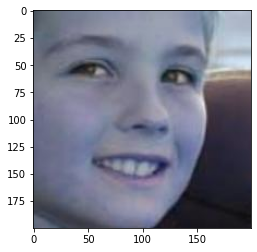

In [20]:
test_image(57,images_f,images_f_2,model)

[[28.182302]]
Predicted Age: 28


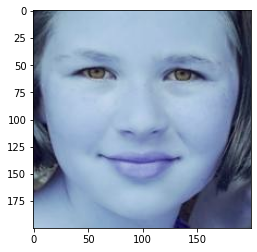

In [21]:
test_image(137,images_f,images_f_2,model)

[[28.205734]]
Predicted Age: 28


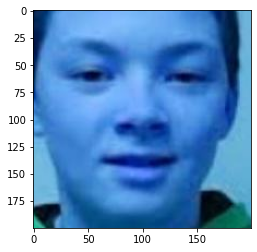

In [22]:
test_image(502,images_f,images_f_2,model)

[[28.197079]]
Predicted Age: 28


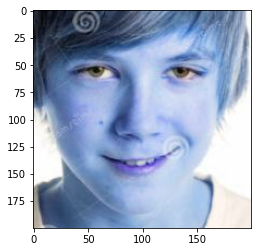

In [23]:
test_image(24,images_f,images_f_2,model)